# PyTorchでMNIST

## 0. 手書き数字の画像データMNISTをダウンロード

In [1]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, data_home=".")

## 1. データの前処理

In [2]:
import numpy as np

X = mnist.data / 255
y = mnist.target

y = np.array(y)
y = y.astype(np.int32)

この画像データのラベルは5です


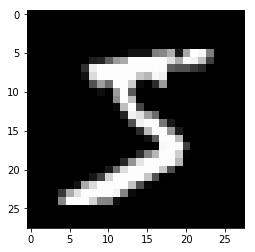

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(X[0].reshape(28, 28), cmap='gray')
print("この画像データのラベルは{:.0f}です".format(y[0]))

## 2. DataLoaderの作成

In [4]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=0)

X_train = torch.Tensor(X_train)
X_test = torch.Tensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

ds_train = TensorDataset(X_train, y_train)
ds_test = TensorDataset(X_test, y_test)

loader_train = DataLoader(ds_train, batch_size=64, shuffle=True)
loader_test = DataLoader(ds_test, batch_size=64, shuffle=False)

## 3. ネットワークの構築

In [5]:
from torch import nn

model = nn.Sequential()
model.add_module('fc1', nn.Linear(28*28*1, 100))
model.add_module('relu1', nn.ReLU())
model.add_module('fc2', nn.Linear(100, 100))
model.add_module('relu2', nn.ReLU())
model.add_module('fc3', nn.Linear(100, 10))

print(model)

'''
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self, n_in, n_mid, n_out):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(n_in, n_mid)  # Chainerと異なり、Noneは受けつけない
        self.fc2 = nn.Linear(n_mid, n_mid)
        self.fc3 = nn.Linear(n_mid, n_out)

    def forward(self, x):
        # 入力xに合わせてforwardの計算を変えられる
        h1 = F.relu(self.fc1(x))
        h2 = F.relu(self.fc2(h1))
        output = self.fc3(h2)
        return output


model = Net(n_in=28*28*1, n_mid=100, n_out=10)  # ネットワークのオブジェクトを生成
print(model)
'''

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


## 4. 誤差関数と最適化手法の設定

In [6]:
from torch import optim

loss_fn = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)

## 5. 学習と推論の設定

In [7]:
def train(epoch):
    model.train()
    
    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs = model(data)
        loss = loss_fn(outputs, targets)
        
        loss.backward()
        optimizer.step()
    
    print("epoch{}: 終了\n".format(epoch))

In [8]:
def test():
    model.eval()
    correct = 0

    with torch.no_grad():
        for data, targets in loader_test:
            outputs = model(data)

            _, predicted = torch.max(outputs.data, 1)
            correct += predicted.eq(targets.data.view_as(predicted)).sum()

    data_num = len(loader_test.dataset)
    print('\nテストデータの正解率: {}/{} ({:.0f}%)\n'.format(correct,
                                                   data_num, 100. * correct / data_num))

## 6. 学習と推論の実行

In [9]:
test()


テストデータの正解率: 956/10000 (9%)



In [10]:
for epoch in range(3):
    train(epoch)

test()

epoch0: 終了

epoch1: 終了

epoch2: 終了


テストデータの正解率: 9593/10000 (95%)



予測結果は2
この画像データの正解ラベルは2です


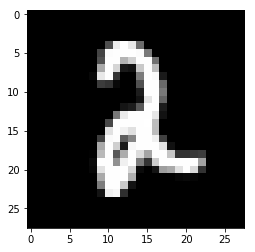

In [11]:
index = 2019

model.eval()
data = X_test[index]
output = model(data)
_, predicted = torch.max(output.data, 0)

print("予測結果は{}".format(predicted))

X_test_show = (X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28, 28), cmap='gray')
print("この画像データの正解ラベルは{:.0f}です".format(y_test[index]))